In [1]:
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np 
import pandas as pd
pd.get_option("display.max_columns")

20

In [2]:
# The path to our CSV file
file = "Resources/original_olympic_data.csv"

# Read our data into pandas
df = pd.read_csv(file)
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [3]:
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [4]:
## USA Females 
#Selecting the columns
starter_olympics_df = df.loc[:, ['Name', 'Sex', 'Age', 'Team', 'NOC',
                                'Year', 'Sport', 'Event', 'Medal', 'ID']]
starter_olympics_df.head()

#Select only USA participants
usa_filter = starter_olympics_df[(starter_olympics_df["NOC"] == "USA")]
usa_filter.head()

#Filter players by females only
female_filter = usa_filter[(usa_filter["Sex"] == "F")]

#drop duplicates based off of the name
female_filter = female_filter.drop_duplicates(subset=['Name'])
female_filter.head()

#Checking for any Nan values on columns to be used
#usa_clean['NOC'].isnull().values.any()

,Name,Sex,Age,Team,NOC,Year,Sport,Event,Medal,ID
282,Mara Katherine Abbott,F,30.0,United States,USA,2016,Cycling,"Cycling Women's Road Race, Individual",NaN,149
283,Margaret Ives Abbott (-Dunne),F,23.0,United States,USA,1900,Golf,Golf Women's Individual,Gold,150
284,Mary Perkins Ives Abbott (Perkins-),F,42.0,United States,USA,1900,Golf,Golf Women's Individual,NaN,151
286,Monica Cecilia Abbott,F,23.0,United States,USA,2008,Softball,Softball Women's Softball,Silver,153
311,Nia Nicole Abdallah,F,20.0,United States,USA,2004,Taekwondo,Taekwondo Women's Featherweight,Silver,165


In [5]:
## USA Males
#Selecting the columns
starter_olympics_df = df.loc[:, ['Name', 'Sex', 'Age', 'Team', 'NOC',
                                'Year', 'Sport', 'Event', 'Medal', 'ID']]
starter_olympics_df.head()

#Select only USA participants
usa_filter = starter_olympics_df[(starter_olympics_df["NOC"] == "USA")]
usa_filter.head()

#Filter players by males only
male_filter = usa_filter[(usa_filter["Sex"] == "M")]

#drop duplicates based off of the name
male_filter = male_filter.drop_duplicates(subset=['Name'])
male_filter.head()

#Checking for any Nan values on columns to be used
#usa_clean['NOC'].isnull().values.any()

,Name,Sex,Age,Team,NOC,Year,Sport,Event,Medal,ID
10,Per Knut Aaland,M,31.0,United States,USA,1992,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN,6
18,John Aalberg,M,31.0,United States,USA,1992,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN,7
186,Stephen Anthony Abas,M,26.0,United States,USA,2004,Wrestling,"Wrestling Men's Featherweight, Freestyle",Silver,84
273,"David ""Dave"" Abbott",M,26.0,United States,USA,1928,Athletics,"Athletics Men's 5,000 metres",NaN,142
276,Jeremy Abbott,M,24.0,United States,USA,2010,Figure Skating,Figure Skating Men's Singles,NaN,145


In [6]:
## Filtering Female players by the following: Sex, Age, Sport, Year, Player ID. 
f_player_data = female_filter[["Sex", "Age", "Sport", "Year", "ID"]]
f_player_data= f_player_data.drop_duplicates()
f_player_data

,Sex,Age,Sport,Year,ID
282,F,30.0,Cycling,2016,149
283,F,23.0,Golf,1900,150
284,F,42.0,Golf,1900,151
286,F,23.0,Softball,2008,153
311,F,20.0,Taekwondo,2004,165
...,...,...,...,...,...
269883,F,19.0,Fencing,2000,135029
269923,F,19.0,Rhythmic Gymnastics,1984,135046
270181,F,16.0,Gymnastics,1992,135165
270220,F,27.0,Rowing,1976,135184


In [7]:
## Filtering Male players by the following: Sex, Age, Sport, Year, Player ID. 
m_player_data = male_filter[["Sex", "Age", "Sport", "Year", "ID"]]
m_player_data= m_player_data.drop_duplicates()
m_player_data

,Sex,Age,Sport,Year,ID
10,M,31.0,Cross Country Skiing,1992,6
18,M,31.0,Cross Country Skiing,1992,7
186,M,26.0,Wrestling,2004,84
273,M,26.0,Athletics,1928,142
276,M,24.0,Figure Skating,2010,145
...,...,...,...,...,...
270794,M,31.0,Athletics,1924,135427
270803,M,28.0,Wrestling,1996,135433
270849,M,27.0,Canoeing,2004,135458
271044,M,25.0,Athletics,1964,135543


In [8]:
#Print the years of Female players in the USA
f_labels = f_player_data['Year'].drop_duplicates()
print(f_labels.tolist())

[2016, 1900, 2008, 2004, 1996, 1972, 2012, 2000, 1992, 1952, 1920, 1980, 1968, 1964, 1984, 1960, 2014, 1956, 1936, 1976, 2010, 1988, 2002, 1994, 1998, 1948, 1928, 2006, 1924, 1932, 1904]


In [9]:
#Print the years of Male players in the USA
m_labels = m_player_data['Year'].drop_duplicates()
print(m_labels.tolist())

[1992, 2004, 1928, 2010, 2000, 1924, 1900, 1932, 1984, 1972, 1988, 1920, 1936, 1904, 1912, 1908, 1996, 1976, 2016, 1952, 2008, 2006, 1948, 1960, 1998, 2012, 1968, 1956, 1964, 2014, 1980, 2002, 1994, 1896, 1906]


In [10]:
#Select specific sports to look at trend for Female Players
selected_sports1 = f_player_data.loc[(f_player_data['Sport'] == 'Athletics'), :]

selected_sports2 = f_player_data.loc[(f_player_data['Sport'] == 'Gymnastics'), :]

selected_sports3 = f_player_data.loc[(f_player_data['Sport'] == 'Swimming'), :]

#participants = [(len(selected_sport1)),(len(selected_sport2)),(len(selected_sport3))]
#print(selected_sport1)   

#Create Dataframes for each sport category above for the Female PlayersA
grp_ss1 = selected_sports1.groupby(by="Year").count()
df_yr1 = pd.DataFrame(grp_ss1)

grp_ss2 = selected_sports2.groupby(by="Year").count()
df_yr2 = pd.DataFrame(grp_ss2)

grp_ss3 = selected_sports3.groupby(by="Year").count()
df_yr3 = pd.DataFrame(grp_ss3)
df_yr3

,Sex,Age,Sport,ID
Year,,,,
1920,6,6,6,6
1924,10,10,10,10
1928,11,11,11,11
1932,7,7,7,7
1936,9,9,9,9
1948,11,11,11,11
1952,13,13,13,13
1956,13,13,13,13
1960,13,13,13,13


In [11]:
#Select specific sports to look at trend for Male Players
selected_sports4 = m_player_data.loc[(m_player_data['Sport'] == 'Athletics'), :]

selected_sports5 = m_player_data.loc[(m_player_data['Sport'] == 'Gymnastics'), :]

selected_sports6 = m_player_data.loc[(m_player_data['Sport'] == 'Swimming'), :]

#participants = [(len(selected_sport1)),(len(selected_sport2)),(len(selected_sport3))]
#print(selected_sport1)   


#Create Dataframes for each sport category above for the Male Players
grp_ss4 = selected_sports4.groupby(by="Year").count()
df_yr4 = pd.DataFrame(grp_ss4)


grp_ss5 = selected_sports5.groupby(by="Year").count()
df_yr5 = pd.DataFrame(grp_ss5)


grp_ss6 = selected_sports6.groupby(by="Year").count()
df_yr6 = pd.DataFrame(grp_ss6)


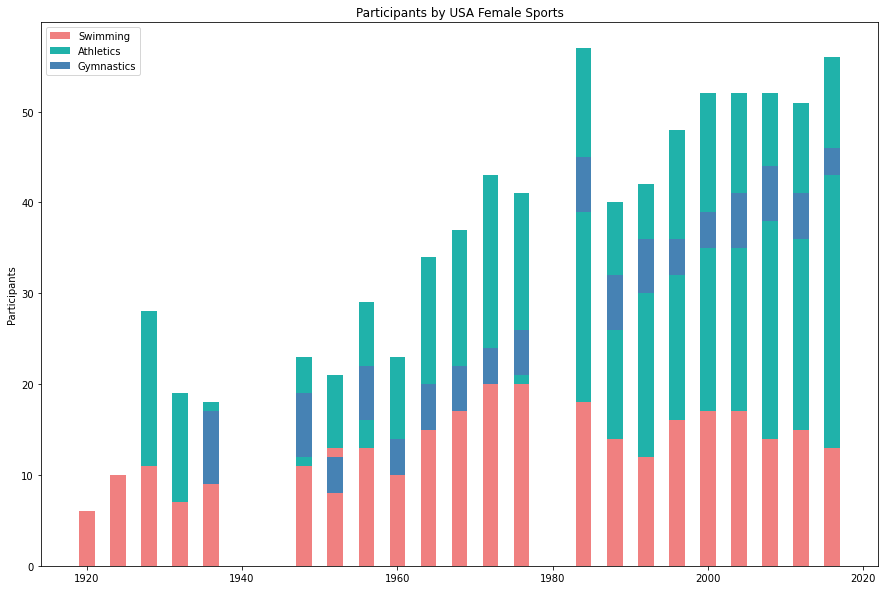

In [43]:
# labels_1 = df_yr1.index
# labels_2 = df_yr2.index

women_count_1 = df_yr1['ID']
women_count_2 = df_yr2['ID']
women_count_3 = df_yr3['ID']

merged_data = pd.merge(left = women_count_1, right = women_count_2, how='outer', on='Year')
merged_data = merged_data.fillna(0)
merged_data = merged_data.astype(int)

merged_data2 = pd.merge(women_count_3, merged_data, how='left', on='Year').fillna(0).astype(int)
# merged_data2
width = 2.00       # the width of the bars: can also be len(x) sequence

# fig, ax = plt.subplots()
fig, ax = plt.subplots(figsize=(15, 10))
# ax.bar(labels, men_means, width, yerr=men_std, label='Men')
ax.bar(merged_data2.index, merged_data2['ID'], width,
       label='Swimming', color= 'lightcoral')
ax.bar(merged_data2.index, merged_data2['ID_x'], width, bottom= merged_data2['ID'],
       label='Athletics', color = 'lightseagreen')
ax.bar(merged_data2.index, merged_data2['ID_y'], width, bottom= merged_data2['ID_x'],
       label='Gymnastics', color = 'steelblue')



ax.set_ylabel('Participants')
ax.set_title('Participants by USA Female Sports')
ax.legend()

plt.show()

In [21]:
men_athl_df = pd.DataFrame(df_yr4['ID'])
men_athl_df.columns = ['Athletics']
men_gym_df = pd.DataFrame(df_yr5['ID'])
men_gym_df.columns = ['Gymnastics']
men_swm_df = pd.DataFrame(df_yr6['ID'])
men_swm_df.columns = ['Swimming']

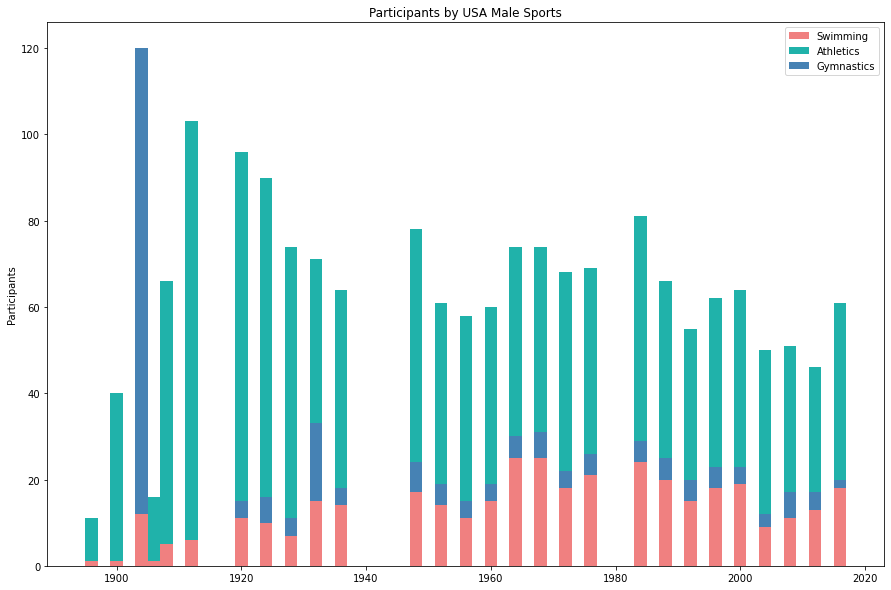

In [44]:
merged_men = pd.merge(men_athl_df, men_gym_df, on="Year", how="outer")
merged_men = pd.merge(merged_men, men_swm_df, on="Year", how="outer")
merged_men.fillna(0, inplace = True)
merged_men = merged_men.astype(int)
merged_men


width = 2.00       # the width of the bars: can also be len(x) sequence

# fig, ax = plt.subplots()
fig, ax = plt.subplots(figsize=(15, 10))
# ax.bar(labels, men_means, width, yerr=men_std, label='Men')
ax.bar(merged_men.index, merged_men['Swimming'], width,
       label='Swimming', color= 'lightcoral')
ax.bar(merged_men.index, merged_men['Athletics'], width, bottom= merged_men['Swimming'],
       label='Athletics', color = 'lightseagreen')
ax.bar(merged_men.index, merged_men['Gymnastics'], width, bottom= merged_men['Swimming'],
       label='Gymnastics', color ='steelblue')



ax.set_ylabel('Participants')
ax.set_title('Participants by USA Male Sports')
ax.legend()

plt.show()